<img src="../images/QISKit-c.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="left">

## _*Visualization of quantum states*_ 

For more information about how to use the IBM Q experience (QX), consult the [tutorials](https://quantumexperience.ng.bluemix.net/qstage/#/tutorial?sectionId=c59b3710b928891a1420190148a72cce&pageIndex=0), or check out the [community](https://quantumexperience.ng.bluemix.net/qstage/#/community).

***
### Contributors
Jay Gambetta, Andrew Cross

In [1]:
# Checking the version of PYTHON; we only support 3 at the moment
import sys
if sys.version_info < (3,0):
    raise Exception("Please use Python version 3 or greater.")
    
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import linalg as la
from itertools import permutations
from functools import partial
import networkx as nx

import sys
sys.path.append("../../")
# importing the QISKit
from qiskit import QuantumCircuit, QuantumProgram
import Qconfig

# import basic plot tools
from qiskit.basicplotter import plot_histogram

In [2]:
# import state tomography functions
from tools.tomography import plot_qsphere, plot_state, plot_bloch_vector
from tools.pauli import pauli_singles

In [3]:
Q_program = QuantumProgram()
Q_program.set_api(Qconfig.APItoken, Qconfig.config["url"]) # set the APIToken and API url

True

## Two qubits states 

In [4]:
n = 2 
# Creating registers
q2 = Q_program.create_quantum_registers("q2", n)
c2 = Q_program.create_classical_registers("c2", n)

# quantum circuit to make an entangled bell state 
bell = Q_program.create_circuit("bell", ["q2"], ["c2"])
bell.h(q2[0])
bell.z(q2[0])
bell.cx(q2[0], q2[1])

# quantum circuit to make an superposition state 
superposition = Q_program.create_circuit("superposition", ["q2"], ["c2"])
superposition.h(q2)

>> quantum_registers created: q2 2
>> classical_registers created: c2 2


In [5]:
device = 'local_qasm_simulator' # the device to run on
Q_program.execute(["superposition", "bell"], device, 1)

state_superposition = Q_program.get_data("superposition")["quantum_state"]
rho_superposition=np.outer(state_superposition, state_superposition.conj())
bloch_superposition = list(map(lambda x: np.real(np.trace(np.dot(x.to_matrix(), rho_superposition))), pauli_singles(n)))

state_bell = Q_program.get_data("bell")["quantum_state"]
rho_bell=np.outer(state_bell, state_bell.conj())
bloch_bell = list(map(lambda x: np.real(np.trace(np.dot(x.to_matrix(), rho_bell))), pauli_singles(n)))

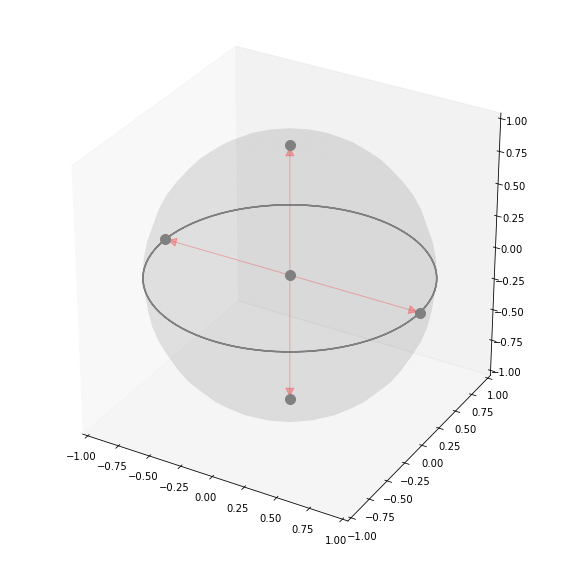

In [6]:
plot_qsphere(state_superposition,n)

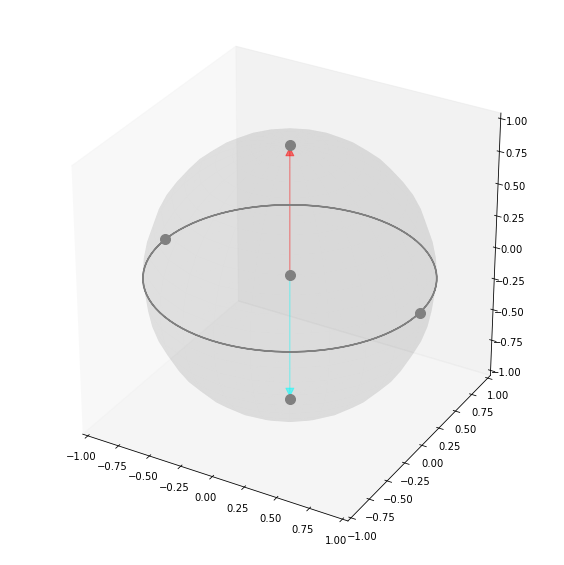

In [7]:
plot_qsphere(state_bell,n)

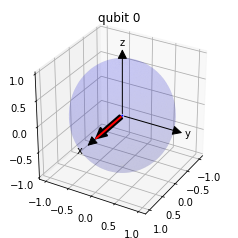

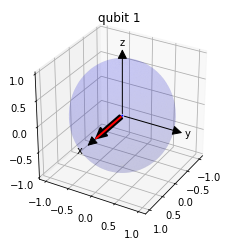

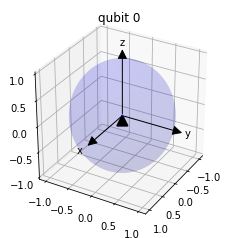

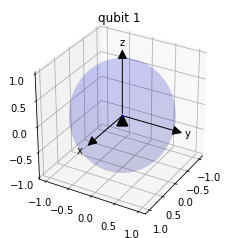

In [8]:
plot_bloch_vector(bloch_superposition,n)
plot_bloch_vector(bloch_bell,n)

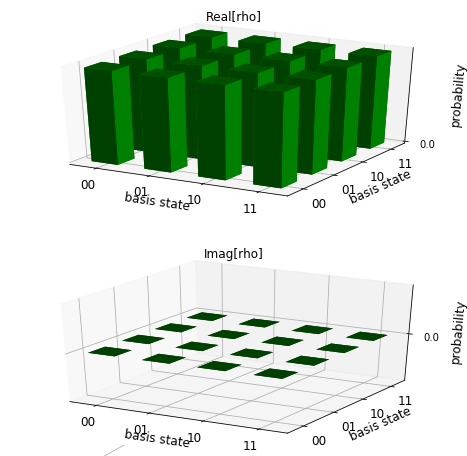

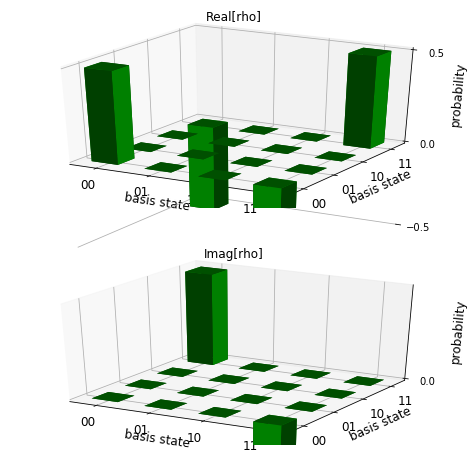

In [9]:
plot_state(rho_superposition,n,"city")
plot_state(rho_bell,n,"city")

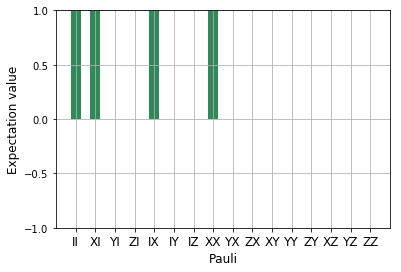

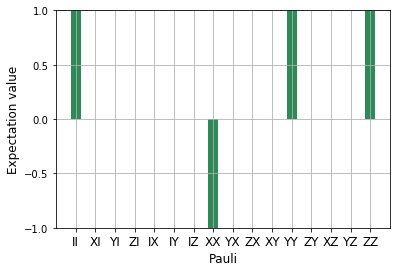

In [10]:
plot_state(rho_superposition,n,"paulivec")
plot_state(rho_bell,n,"paulivec")

## three qubits states 

In [11]:
n = 3
# Creating registers
q2 = Q_program.create_quantum_registers("q2", n)
c2 = Q_program.create_classical_registers("c2", n)

# quantum circuit to make an entangled bell state 
bell = Q_program.create_circuit("bell", ["q2"], ["c2"])
bell.h(q2[0])
bell.z(q2[0])
bell.cx(q2[0], q2[1])
bell.cx(q2[0], q2[2])

# quantum circuit to make an superposition state 
superposition = Q_program.create_circuit("superposition", ["q2"], ["c2"])
superposition.h(q2)


>> quantum_registers created: q2 3
>> classical_registers created: c2 3


In [12]:
device = 'local_qasm_simulator' # the device to run on
Q_program.execute(["superposition", "bell"], device, 1)

state_superposition = Q_program.get_data("superposition")["quantum_state"]
rho_superposition=np.outer(state_superposition, state_superposition.conj())
bloch_superposition = list(map(lambda x: np.real(np.trace(np.dot(x.to_matrix(), rho_superposition))), pauli_singles(n)))

state_bell = Q_program.get_data("bell")["quantum_state"]
rho_bell=np.outer(state_bell, state_bell.conj())
bloch_bell = list(map(lambda x: np.real(np.trace(np.dot(x.to_matrix(), rho_bell))), pauli_singles(n)))

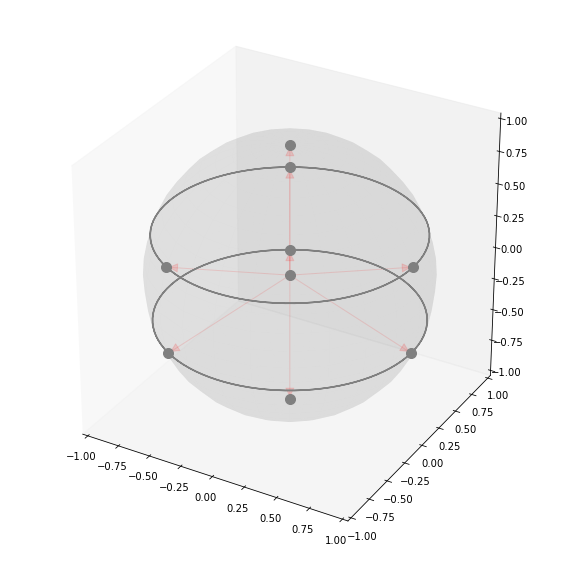

In [13]:
plot_qsphere(state_superposition,n)

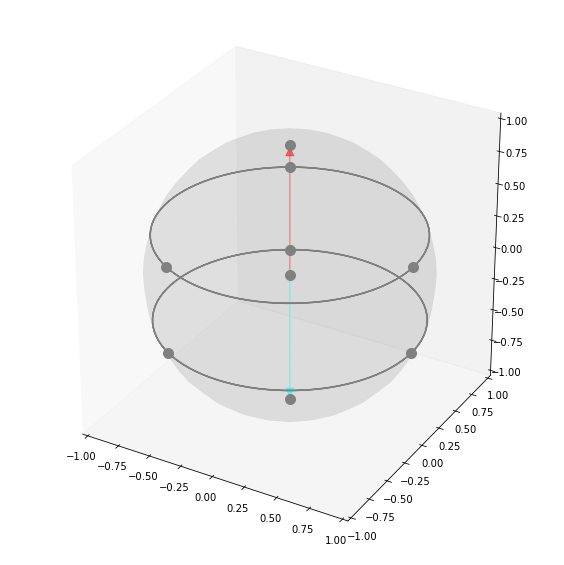

In [14]:
plot_qsphere(state_bell,n)

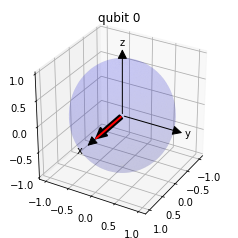

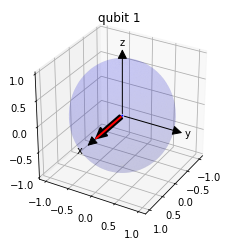

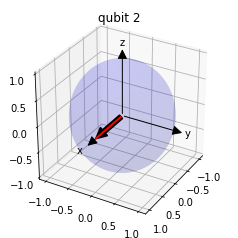

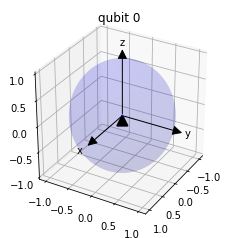

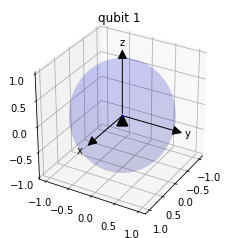

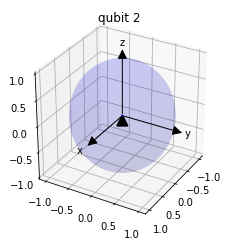

In [15]:
plot_bloch_vector(bloch_superposition,n)
plot_bloch_vector(bloch_bell,n)

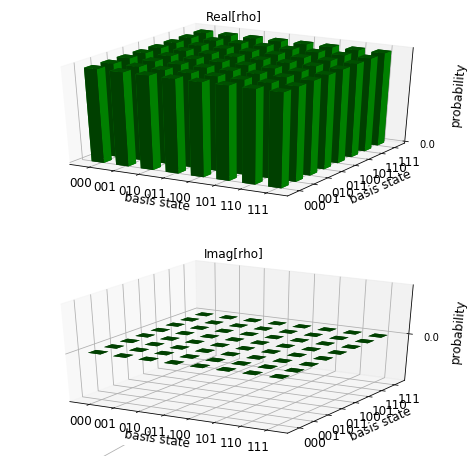

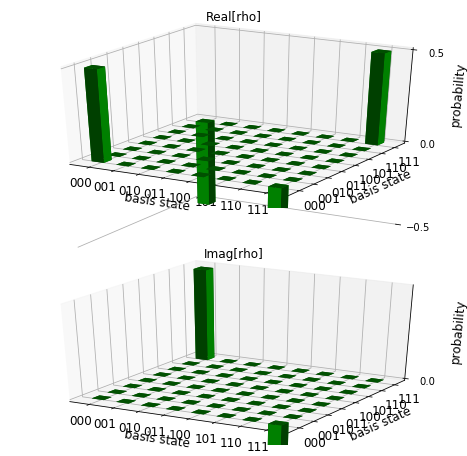

In [16]:
plot_state(rho_superposition,n,"city")
plot_state(rho_bell,n,"city")

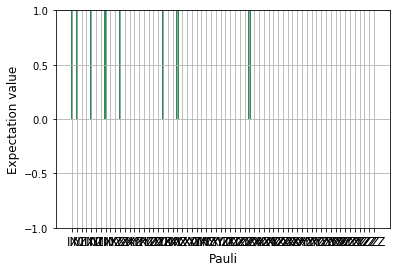

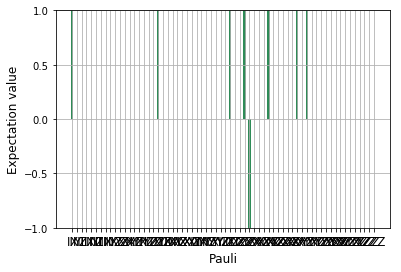

In [17]:
plot_state(rho_superposition,n,"paulivec")
plot_state(rho_bell,n,"paulivec")

In [18]:
rho_bell

array([[ 0.5 +0.00000000e+00j,  0.0 +0.00000000e+00j,
         0.0 +0.00000000e+00j,  0.0 +0.00000000e+00j,
         0.0 +0.00000000e+00j,  0.0 +0.00000000e+00j,
         0.0 +0.00000000e+00j, -0.5 -6.12323400e-17j],
       [ 0.0 +0.00000000e+00j,  0.0 +0.00000000e+00j,
         0.0 +0.00000000e+00j,  0.0 +0.00000000e+00j,
         0.0 +0.00000000e+00j,  0.0 +0.00000000e+00j,
         0.0 +0.00000000e+00j,  0.0 -0.00000000e+00j],
       [ 0.0 +0.00000000e+00j,  0.0 +0.00000000e+00j,
         0.0 +0.00000000e+00j,  0.0 +0.00000000e+00j,
         0.0 +0.00000000e+00j,  0.0 +0.00000000e+00j,
         0.0 +0.00000000e+00j,  0.0 -0.00000000e+00j],
       [ 0.0 +0.00000000e+00j,  0.0 +0.00000000e+00j,
         0.0 +0.00000000e+00j,  0.0 +0.00000000e+00j,
         0.0 +0.00000000e+00j,  0.0 +0.00000000e+00j,
         0.0 +0.00000000e+00j,  0.0 -0.00000000e+00j],
       [ 0.0 +0.00000000e+00j,  0.0 +0.00000000e+00j,
         0.0 +0.00000000e+00j,  0.0 +0.00000000e+00j,
         0.0 +0.00000000